In [1]:
from copy import copy

from settings.BaseConfiguration import Configuration
from baseClasses.RelicStats import RelicStats
from estimator.DefaultEstimator import DefaultEstimator
from visualizer.visualizer import visualize

from characters.nihility.Kafka import Kafka
from lightCones.nihility.BeforeTheTutorialMissionStarts import BeforeTheTutorialMissionStarts
from lightCones.nihility.EyesOfThePrey import EyesOfThePrey
from lightCones.nihility.Fermata import Fermata
from lightCones.nihility.GoodNightAndSleepWell import GoodNightAndSleepWell
from lightCones.nihility.InTheNameOfTheWorld import InTheNameOfTheWorld
from lightCones.nihility.IncessantRain import IncessantRain
from lightCones.nihility.PatienceIsAllYouNeed import PatienceIsAllYouNeed
from lightCones.nihility.ResolutionShinesAsPearlsOfSweat import ResolutionShinesAsPearlsOfSweat
from lightCones.nihility.SolitaryHealing import SolitaryHealing
from lightCones.nihility.WeWillMeetAgain import WeWillMeetAgain

from relicSets.planarSets.SpaceSealingStation import SpaceSealingStation
from relicSets.relicSets.BandOfSizzlingThunder import BandOfSizzlingThunder2pc, BandOfSizzlingThunder4pc


In [2]:
VisualizationDict = {}
VisualizationDict['CharacterDict'] = {} # store character information here
VisualizationDict['EffectDict'] = {} # store dps metrics here, not including breaks or constantly ticking dots. May include limited dots like Yanqing
VisualizationDict['DotDict'] = {} # store dot damage here, not including dot detonations
VisualizationDict['BreakDict'] = {} # store break damage here, not including dot detonations

# Reminder not to use this as a true DPS comparison
# SP and Energy surplus/deficits are not balanced
# I haven't spent time optimizing builds either
# This is mostly just a tutorial to show you how to use the calculator

config = copy(Configuration)
config['numEnemies'] = 2
config['enemySpeed'] = 132 / 1.125 # assume 25% action delay every 2 enemy turns from toughness break

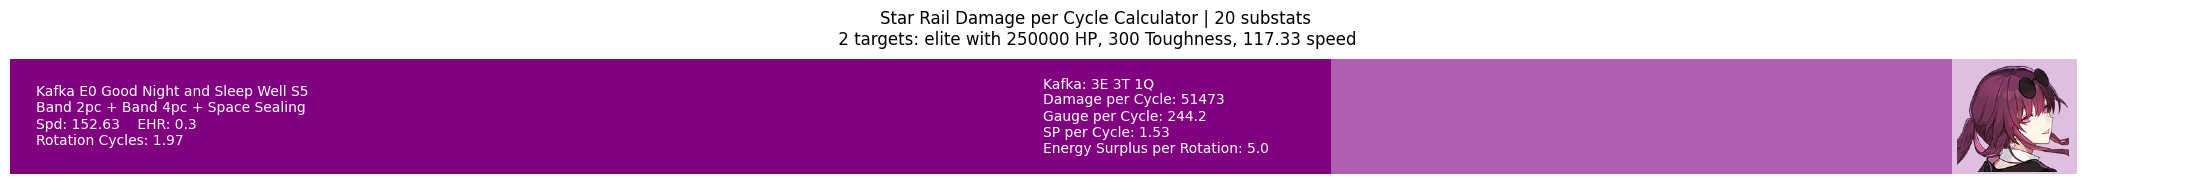

In [3]:
# Kafka
KafkaCharacter = Kafka(relicstats = RelicStats(mainstats = ['percAtk', 'flatSpd', 'percAtk', 'lighDmg'],
                        substats = {'EHR': 3, 'percAtk': 5, 'flatSpd': 12}),
            lightcone = GoodNightAndSleepWell(**config),
            relicsetone = BandOfSizzlingThunder2pc(), relicsettwo = BandOfSizzlingThunder4pc(), planarset = SpaceSealingStation(),
            **config)

KafkaRotation = [
        KafkaCharacter.useSkill() * 3,
        KafkaCharacter.useTalent() * 3,
        KafkaCharacter.useUltimate(),
]

DefaultEstimator('Kafka: 3E 3T 1Q', KafkaRotation, KafkaCharacter, config, VisualizationDict, dotMode='alwaysAll')

visualize(VisualizationDict, **config)